In [9]:
import numpy as np
import matplotlib.pyplot as plt
#import scipy.fftpack as scfft

plt.rcParams['figure.figsize'] = [8, 5]

#<span style="color:red">word</span>

# Contents
- [Trying FFT with online sine-wave generator](#Trying-FFT-with-online-sine-wave-generator)
- [FFT with random waves](#FFT-with-random-waves)
- [PFB Trial](#PFB-Trial)
- [PFB Trial 2](#PFB-Trial-2)

## Trying FFT with online sine-wave generator

In [4]:
# sine-wave generator
def sine_wave(f,overSampRate,phase,nCyl):
	"""
	Generate sine wave signal with the following parameters
	Parameters:
		f : frequency of sine wave in Hertz
		overSampRate : oversampling rate (integer)
		phase : desired phase shift in radians
		nCyl : number of cycles of sine wave to generate
	Returns:
		(t,g) : time base (t) and the signal g(t) as tuple
	Example:
		f=10; overSampRate=30;
		phase = 1/3*np.pi;nCyl = 5;
		(t,g) = sine_wave(f,overSampRate,phase,nCyl)
	"""
	fs = overSampRate*f # sampling frequency
	t = np.arange(0,nCyl*1/f-1/fs,1/fs) # time base
	g = np.cos(2*np.pi*f*t+phase) # replace with cos if a cosine wave is desired
	return (t,g) # return time base and signal g(t) as tuple

In [111]:
# generate a sine-wave
freq = 10
osr = 30
freq_samp = freq*osr
phi = 1/3 * np.pi
cycles = 10

freq2 = 15
osr2 = 20
freq_samp2 = freq2*osr2
cycles2 = 12

(t,x) = sine_wave(freq, osr, phi, cycles)
(t2,x2) = sine_wave(freq2, osr2, 0, cycles2)

print(np.shape(t))
print(np.shape(t2))

t = t[:239]
xc = np.array(x[:239]) + np.array(x2[:239])

(299,)
(239,)


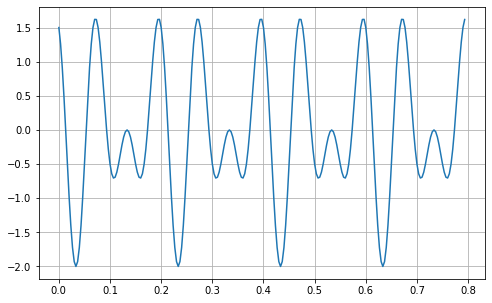

In [178]:
# the sine-wave
#plt.plot(t, x[:239])
#plt.plot(t2,x2)
plt.plot(t,xc)
plt.grid()
plt.show()

In [103]:
# compute the fft(s)
N1 = 149
N2 = 2048

X_N1 = np.fft.fft(x, n=N1)
t_N1 = np.arange(0, N1)

X_N2 = np.fft.fft(x, n=N2)
t_N2 = np.arange(0,N2)

X2_N2 = np.fft.fft(x2, n=N2)
t2_N2 = np.arange(0,N2)

Xc_N2 = np.fft.fft(xc, n=N2)
tc_N2 = np.arange(0,N2)

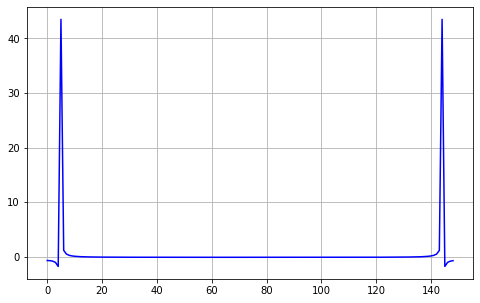

In [104]:
# raw fft, 149
plt.plot(t_N1, X_N1.real, color='b')
plt.grid()
plt.show()

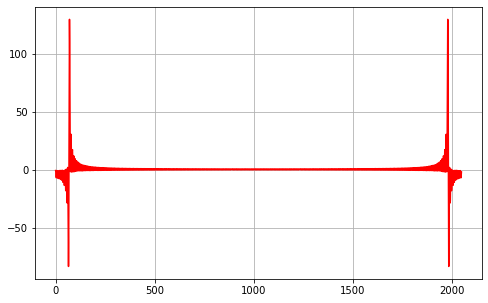

In [105]:
# raw fft, 1024
plt.plot(t_N2, X_N2.real, color='r')
plt.grid()
plt.show()

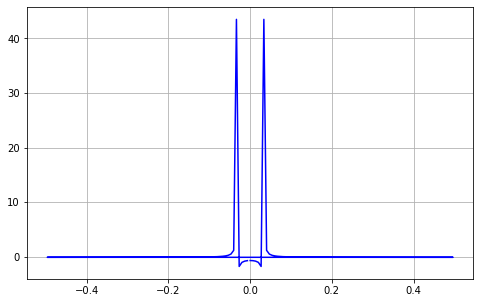

In [106]:
# normalised, 149
plt.plot(np.fft.fftfreq(N1), X_N1.real, color='b')
plt.grid()
plt.show()

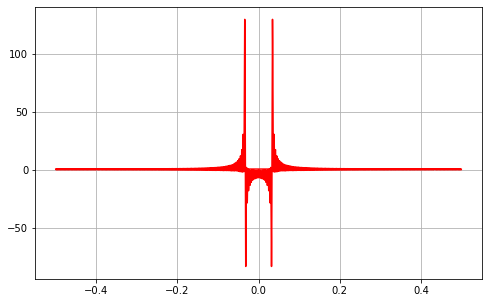

In [107]:
# normalised, 1024
plt.plot(np.fft.fftfreq(N2), X_N2.real, color='r')
plt.grid()
plt.show()

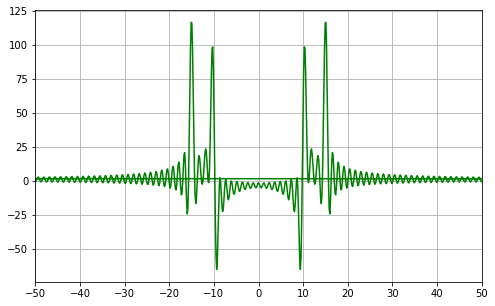

In [152]:
# absolute freq
fVal = np.fft.fftfreq(N2)*freq_samp
fVal2 = np.fft.fftfreq(N2)*freq_samp2
#plt.plot(fVal, X_N2.real, color='r')
#plt.plot(fVal2, X2_N2.real, color='b')
plt.plot(fVal2, Xc_N2.real, color='g') # the fft of the composite signal
plt.xlim(-50,50)
plt.xticks(np.arange(-50,50+9,10))
plt.grid()
plt.show()

## FFT with random waves
### (Didn't really finish trying this out yet)

In [14]:
# initialise the waveform
time_domain = np.linspace(-4*np.pi,4*np.pi,200)
sine_td = np.sin(time_domain)

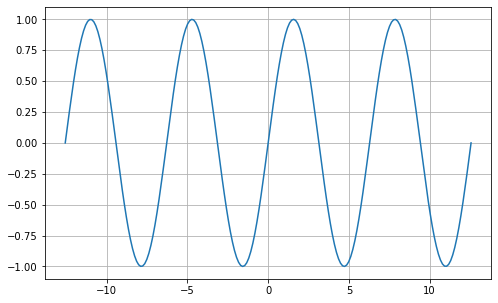

In [15]:
# what it looks like
plt.plot(time_domain, sine_td)
plt.grid()
plt.show()

In [16]:
# compute the fft
N = 1024

sine_fft = np.fft.fft(sine_td,N)
nVal = np.fft.fftfreq(1024)

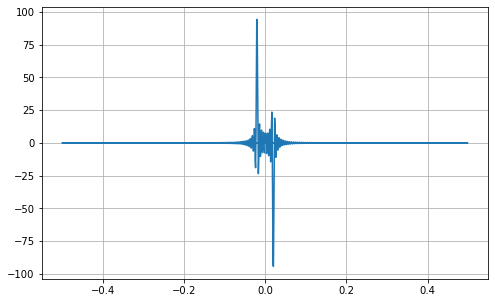

In [17]:
plt.plot(nVal, sine_fft.imag)
plt.grid()
plt.show()

## PFB Trial

In [123]:
# shift t
tc = t-t[120]

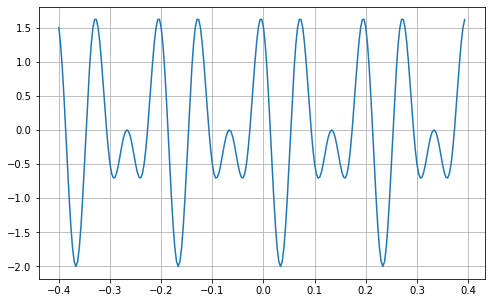

In [124]:
# the composite function that we are interested in
plt.plot(tc,xc)
plt.grid()
plt.show()

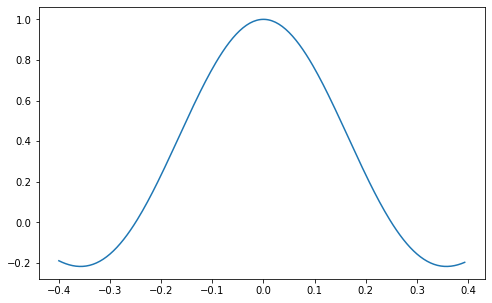

In [128]:
# sinc function
sinc = np.sinc(4*tc)
plt.plot(tc, sinc)

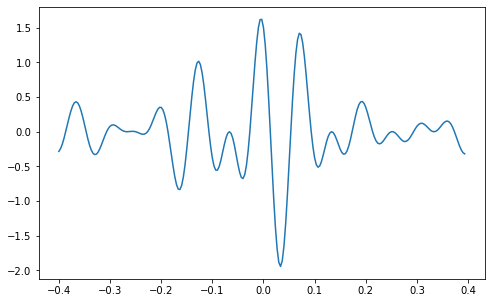

In [174]:
# point-wise multiply the sinc function and the signal
conv = sinc*xc
plt.plot(tc, conv)

In [175]:
# separate into four blocks
conv1, conv2, conv3, conv4 = conv[0:60], conv[60:120], conv[120:180], conv[180:]
conv4=np.append(conv4,0)

In [176]:
# sum up the four blocks
conv_sum = conv1 + conv2 + conv3 + conv4

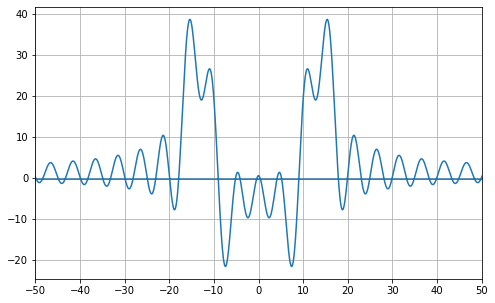

In [177]:
# compute the fft
fVal_conv = np.fft.fftfreq(4096)*freq_samp
conv_fft = np.fft.fft(conv_sum, n=4096)
plt.plot(fVal_conv, conv_fft.real)
plt.xlim(-50,50)
plt.xticks(np.arange(-50,50+9,10))
plt.grid()
plt.show()

## PFB Trial 2

As suggested, we generate a single sine wave with a random period:

In [7]:
freq3 = 12.56
osr3 = 30
freq_samp3 = freq3*osr3
phi3 = 0
cycles3 = 10

(t3,x3) = sine_wave(freq3, osr3, 0, cycles3)

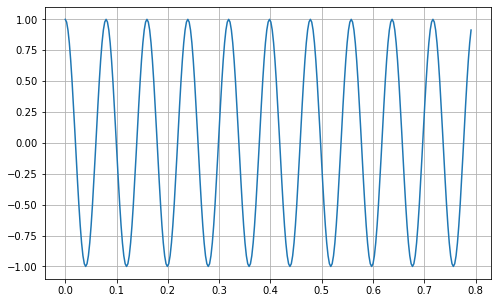

In [10]:
plt.plot(t3,x3)
plt.grid()
plt.show()

We want to cut a boxcar in the Fourier space; that is, we want to select a range of frequencies, and see if our signal has any component that has a frequency that lies within the ascribed range <span style="color:red">(Question: is this the motivation for what we are doing? Is this why you specifically mentioned that the method has great 'out of band rejection'?)</span>.

Since we have that our signal has $f = 12.56\;\text{Hz}$, we use a boxcar that has height $h = 1$ <span style="color:red"></span><span style="color:red">(Question: how do we determine the height that we want to use?)</span>, and frequency in the range $f\in[10,15]$, just for illustration purposes. Since we need the frequency to be angular, we have that in the Fourier space, the boxcar has $\omega\in[20\pi,30\pi]$.

We can now compute the inverse Fourier transform of the boxcar. Let the boxcar be denoted by $F(\omega)$; then,
$$f(t) = \frac{1}{2\pi} \int_{20\pi}^{30\pi}F(\omega)e^{i\omega t}\,\mathrm{d}\omega,$$
which we can then recognise that $F(\omega) = 1$ in the range of integration. We can thus compute the integral, and obtain that:
$$f(t) = \frac{e^{25\pi i t}\sin(5\pi t)}{\pi t},$$
which we then use in our calculations.

<span style="color:red"></span><span style="color:red">(Question: by doing a Fourier transform, we would inevitably introduce a complex component in the sinc function. How is it supposed to be delt with? Or have I somehow done something wrong in the process?)</span>

In [ ]:
# define the window function

def window(t):
    return e^{}

In [ ]:
t = np.linspace(0,0.8,50